In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import pickle

In [ ]:
data = quandl.get('NSE/TATAGLOBAL')

In [ ]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [ ]:
data.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05


In [ ]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000
mean,151.818810,154.145190,149.361619,151.584762,151.561595,2.327641e+06,3919.237300
std,49.350352,50.127368,48.597083,49.420366,49.401844,2.081348e+06,4547.900775
min,81.100000,82.800000,80.000000,81.000000,80.950000,3.961000e+04,37.040000
25%,120.750000,122.675000,119.000000,120.600000,120.550000,1.147086e+06,1462.815000
50%,142.250000,144.300000,140.425000,142.000000,141.950000,1.768579e+06,2552.165000
75%,159.000000,161.500000,156.825000,158.712500,158.762500,2.795726e+06,4548.082500
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2100 entries, 2010-07-21 to 2019-01-04
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2100 non-null   float64
 1   High                  2100 non-null   float64
 2   Low                   2100 non-null   float64
 3   Last                  2100 non-null   float64
 4   Close                 2100 non-null   float64
 5   Total Trade Quantity  2100 non-null   float64
 6   Turnover (Lacs)       2100 non-null   float64
dtypes: float64(7)
memory usage: 131.2 KB


# Classification
* Whether Buy or Not




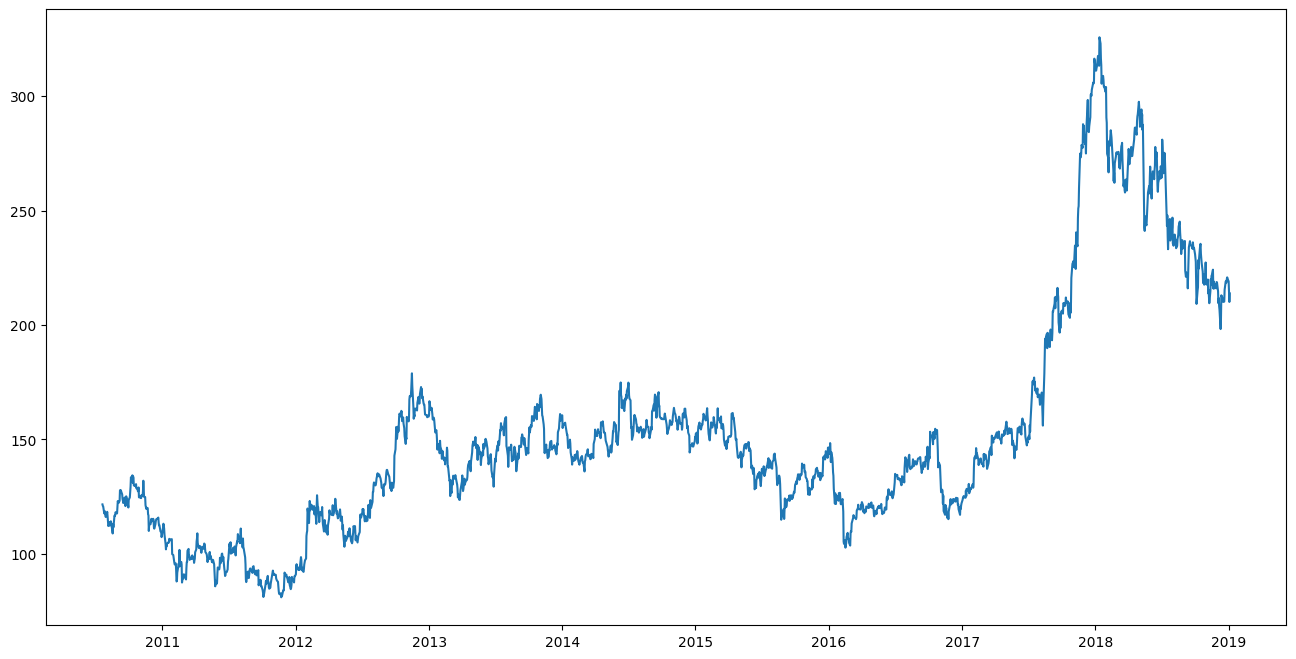

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label = 'Closing Price')

In [ ]:
data['Open - Close'] = data['Open'] - data['Close']
data['High- Low'] = data['High'] - data['Low']
data = data.dropna()

Input Features to predict whether customer should buy or sell the stock

In [ ]:
X = data[['Open - Close', 'High- Low']]
X.head()

,Open - Close,High- Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [ ]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)


#Collecting close value of next 'Close'
#if 'Close' value of net Close is Greater than current value then It means nnext day the stock is expensive. Then return 1 othervise -1

In [ ]:
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state= 44)

# Implementing KNN


In [ ]:
# Function to train classification model
def train_classification_model(X_train, Y_train):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import GridSearchCV

    params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
    knn = KNeighborsClassifier()
    model = GridSearchCV(knn, params, cv=5)

    model.fit(X_train, Y_train)


    # Save the classification model
    with open('knn_classification_model.pkl', 'wb') as f:
        pickle.dump(model, f)

    return model

      # accuracy_train = accuracy_score(Y_train, model.predict(X_train))
      # accuracy_test = accuracy_score(Y_test, model.predict(X_test))

      # print('Train_data Accuracy: %.2f' %accuracy_train)
      # print('Test_data Accuracy: %.2f' %accuracy_test)



In [ ]:
# Train classification model
classification_model = train_classification_model(X_train, Y_train)

In [ ]:
def predict_classification(model, features):
    return model.predict(features)

In above table first row, the Actual class says to Not to Buy stock but the Pred_class Says to buy.

# Implementing KNN Regressor

In [ ]:
y = data['Close']

In [ ]:
y

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
               ...  
2018-12-31    219.40
2019-01-01    219.10
2019-01-02    214.60
2019-01-03    210.05
2019-01-04    213.80
Name: Close, Length: 2100, dtype: float64

In [ ]:
# Train-test split for regression
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=44)


In [ ]:
def train_regression_model(x_train_reg, y_train_reg):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import GridSearchCV

    param = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
    knn = KNeighborsRegressor()
    model = GridSearchCV(knn, param, cv=5)

    model.fit(x_train_reg, y_train_reg)

    # Save the regression model
    with open('knn_regression_model.pkl', 'wb') as f:
        pickle.dump(model, f)

    return model

In [ ]:
# Train regression model
regression_model = train_regression_model(x_train_reg, y_train_reg)


In [ ]:
# Function to predict using regression model
def predict_regression(model, features):
    return model.predict(features)


In [ ]:
# Example usage
classification_predictions = predict_classification(classification_model, X_test)
regression_predictions = predict_regression(regression_model, X_test)


In [ ]:
# Evaluate models
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_train = accuracy_score(Y_train, classification_model.predict(X_train))
accuracy_test = accuracy_score(Y_test, classification_model.predict(X_test))

print('Train_data Accuracy: %.2f' % accuracy_train)
print('Test_data Accuracy: %.2f' % accuracy_test)

# Print regression predictions
print(regression_predictions)

# Calculate root mean square error
rms = np.sqrt(np.mean(np.power((np.array(y_test_reg) - np.array(regression_predictions)), 2)))
print('RMSE: %.2f' % rms)


Train_data Accuracy: 0.68
Test_data Accuracy: 0.51
[111.27       142.19       138.59666667 150.4        186.53
 135.12333333 151.13666667 141.71333333 118.66333333 144.59333333
 160.44333333 140.72       156.5        207.73666667 132.97
 207.62       111.35333333 134.16       132.28666667 138.60666667
 161.86666667 131.26       121.99333333 135.12333333 164.45666667
 216.39       135.43666667 137.07       162.64       128.51
 141.51333333 129.99666667 152.64666667 134.33333333 196.32333333
 120.84333333 156.49333333 157.4        145.47       132.08333333
 122.75666667 128.77       130.84333333 159.17666667 167.54666667
 168.98       189.31333333 184.33       187.08333333 130.23666667
 141.33333333 136.24       130.08       162.26333333 152.51333333
 124.14       134.20333333 139.87666667 113.61666667 137.07
 136.69       120.16666667 205.71333333 122.48333333 141.50666667
 136.37666667 114.93       132.82666667 181.68       125.15666667
 136.37666667 211.39333333 174.05333333 162.33333

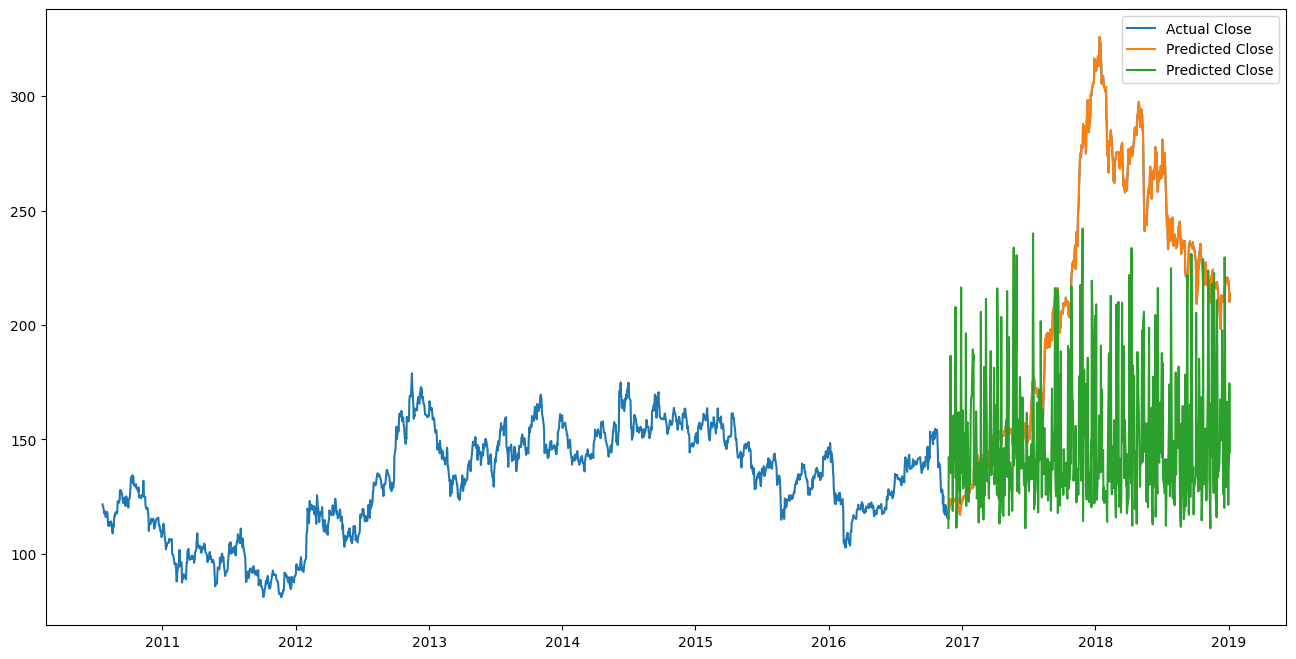

In [ ]:
# Plot predictions
valid = data.iloc[X_train.shape[0]:].copy()
valid['Predictions'] = regression_predictions
plt.figure(figsize=(16, 8))
plt.plot(data['Close'], label='Actual Close')
plt.plot(valid[['Close', 'Predictions']], label='Predicted Close')
plt.legend()
plt.show()